# Uber Data Analysis

- **What are the most common trip ?**

- **What is the distribution of trip categories (Business vs. Personal) ?**

- **How does the distance (in miles) vary by trip purpose?** 

-  **What times of day have the highest Uber usage ?**

-  **Analyzing Distance and Time of Day on Category**

- **What are the top starting and stopping locations for trips ?**

-  **Number of rides per week or per month?**

- **How do average distances and durations vary across different trip purposes and times of day?**

- **What is AVG Duration for trip by Purpose?**

In [44]:
import pandas as pd
import numpy as np 
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px

# - **Dataunderstanding**

In [2]:
df=pd.read_csv('UberDataset.csv')
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [3]:
df.columns

Index(['START_DATE', 'END_DATE', 'CATEGORY', 'START', 'STOP', 'MILES',
       'PURPOSE'],
      dtype='object')

In [4]:
df.tail()
# i dont need the 'totals' row

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site
1155,Totals,NaN,NaN,NaN,NaN,12204.7,NaN


In [5]:
df.describe()


,MILES
count,1156.000000
mean,21.115398
std,359.299007
min,0.500000
25%,2.900000
50%,6.000000
75%,10.400000
max,12204.700000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


# - **Data Cleaning** 

In [7]:
# Dealing with missing data 
df.isnull().sum()

START_DATE      0
END_DATE        1
CATEGORY        1
START           1
STOP            1
MILES           0
PURPOSE       503
dtype: int64

In [8]:
#deal with missing data 
df['PURPOSE'].fillna(df['PURPOSE'].mode()[0],inplace=True)
df.isnull().sum()
df.drop(df.index[-1], inplace=True)
df.isnull().sum()
df.sample(5)
df['START'] = df['START'].str.replace('Unknown Location', df['START'].mode()[0], regex=False)
df['STOP'] = df['STOP'].str.replace('Unknown Location', df['STOP'].mode()[0], regex=False)



C:\Users\huawe\AppData\Local\Temp\ipykernel_28596\3736298687.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['PURPOSE'].fillna(df['PURPOSE'].mode()[0],inplace=True)


In [9]:
#data types
#edit string first  
df['START_DATE'] = df['START_DATE'].str.replace('-', '/', regex=False)
df['END_DATE'] = df['END_DATE'].str.replace('-', '/', regex=False)

df['START_DATE']=pd.to_datetime(df['START_DATE'],errors='coerce')
df['END_DATE']=pd.to_datetime(df['END_DATE'],errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1155 entries, 0 to 1154
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   START_DATE  1155 non-null   datetime64[ns]
 1   END_DATE    1155 non-null   datetime64[ns]
 2   CATEGORY    1155 non-null   object        
 3   START       1155 non-null   object        
 4   STOP        1155 non-null   object        
 5   MILES       1155 non-null   float64       
 6   PURPOSE     1155 non-null   object        
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 63.3+ KB


In [10]:
# split the start date and end date columns to date and time separately
df['START_DATE_ONLY'] = df['START_DATE'].dt.date    
df['START_TIME_ONLY'] = df['START_DATE'].dt.time   

df['END_DATE_ONLY'] = df['END_DATE'].dt.date        
df['END_TIME_ONLY'] = df['END_DATE'].dt.time
df.drop(columns=['START_DATE','END_DATE'],inplace=True)
df.sample(5)

,CATEGORY,START,STOP,MILES,PURPOSE,START_DATE_ONLY,START_TIME_ONLY,END_DATE_ONLY,END_TIME_ONLY
287,Business,Kissimmee,Orlando,16.1,Temporary Site,2016-03-31,12:47:00,2016-03-31,13:22:00
718,Business,Lahore,Cary,7.9,Meeting,2016-08-26,15:59:00,2016-08-26,16:24:00
272,Personal,Kissimmee,Orlando,8.8,Meeting,2016-03-26,15:19:00,2016-03-26,15:49:00
486,Business,Mandeville,Metairie,30.0,Meeting,2016-06-27,12:22:00,2016-06-27,13:02:00
811,Business,R?walpindi,Cary,12.4,Meeting,2016-10-14,10:16:00,2016-10-14,10:52:00


In [11]:
# edit strings of start and stop columns 
df['START'] = df['START'].str.replace('?', '', regex=False)
df['STOP'] = df['STOP'].str.replace('?', '', regex=False)
df['START_DATE_ONLY']=pd.to_datetime(df['START_DATE_ONLY'])
df['END_DATE_ONLY']=pd.to_datetime(df['END_DATE_ONLY'])
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1155 entries, 0 to 1154
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   CATEGORY         1155 non-null   object        
 1   START            1155 non-null   object        
 2   STOP             1155 non-null   object        
 3   MILES            1155 non-null   float64       
 4   PURPOSE          1155 non-null   object        
 5   START_DATE_ONLY  1155 non-null   datetime64[ns]
 6   START_TIME_ONLY  1155 non-null   object        
 7   END_DATE_ONLY    1155 non-null   datetime64[ns]
 8   END_TIME_ONLY    1155 non-null   object        
dtypes: datetime64[ns](2), float64(1), object(6)
memory usage: 81.3+ KB


# 1. What are the most common trips route?


C:\Users\huawe\AppData\Local\Temp\ipykernel_28596\2995634442.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Trip_Count', y=common_trips['START']+" TO " +common_trips['STOP'] , data=common_trips, palette='viridis')


Text(0, 0.5, 'PATH')

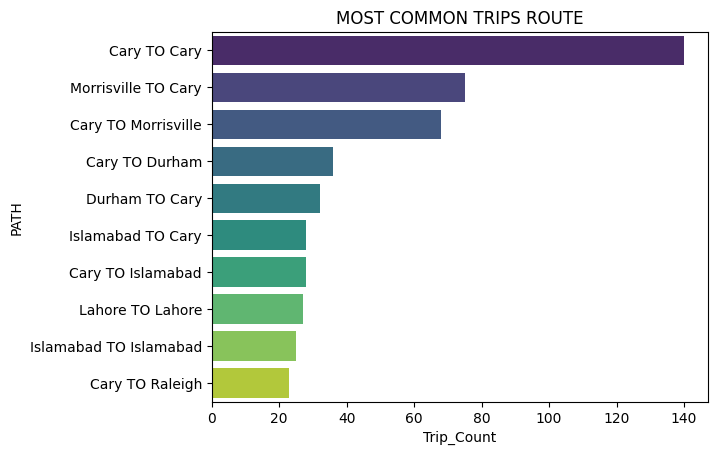

In [12]:
#Q1.2
common_trips=df.groupby(['START','STOP']).size().reset_index(name='Trip_Count').sort_values(by='Trip_Count',ascending=False).head(10)
sns.barplot(x='Trip_Count', y=common_trips['START']+" TO " +common_trips['STOP'] , data=common_trips, palette='viridis')
plt.title('MOST COMMON TRIPS ROUTE')
plt.ylabel('PATH')



## Q2. **What is the distribution of trip categories (Business vs. Personal) ?**


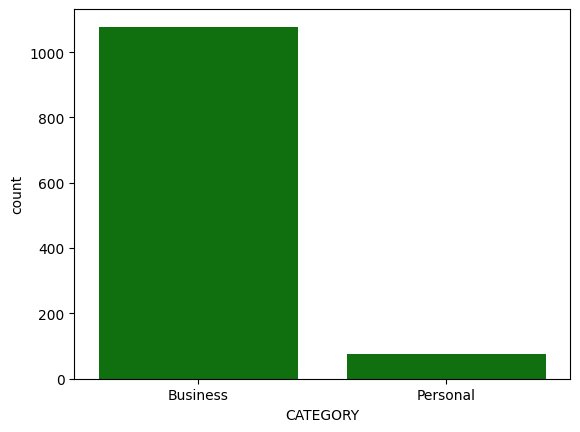

In [13]:
sns.countplot(data=df,x=df['CATEGORY'],color="green")
plt.show()




## Q3. **Purpose of Trips Distrbution?** 


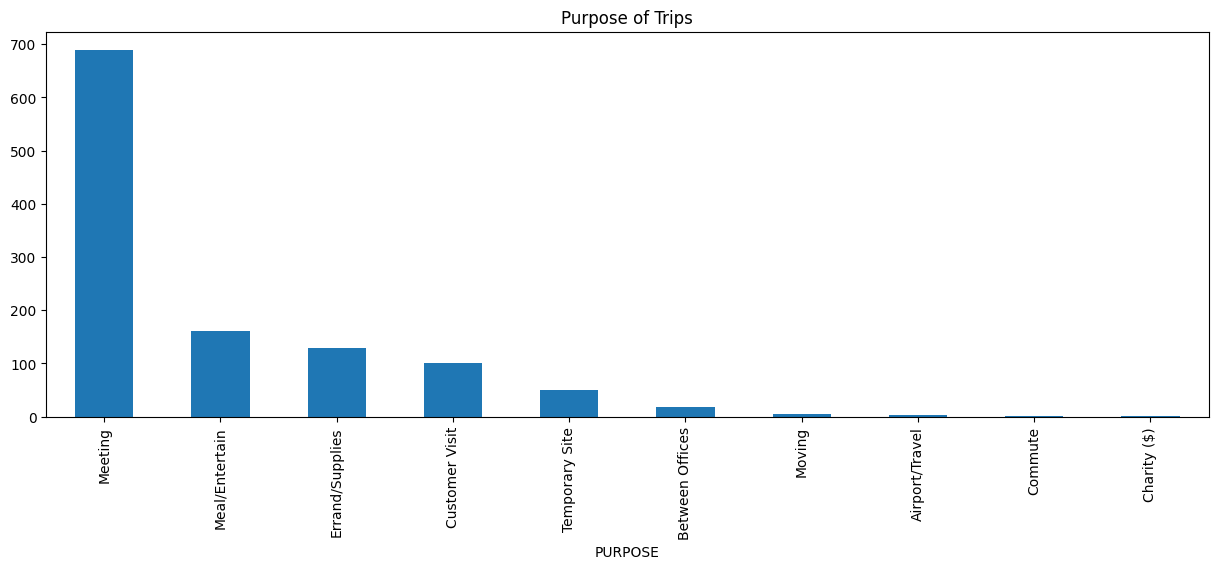

In [52]:
trip_purposes = df['PURPOSE'].value_counts().sort_values(ascending=False)
trip_purposes=trip_purposes.head(10)


plt.figure(figsize=(15, 5))
trip_purposes.plot(kind='bar')
plt.title('Purpose of Trips')
plt.ylabel('')
plt.show()

# Q4.**How does the distance (in miles) vary by trip purpose?** 

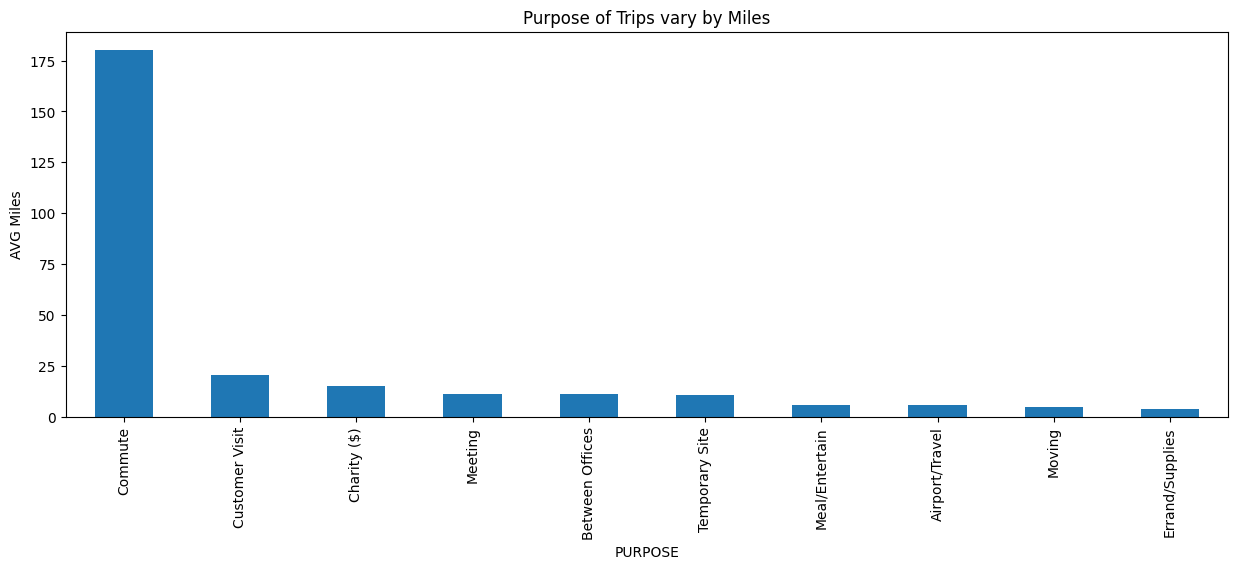

In [65]:
trip_purposes_MIles = df.groupby('PURPOSE')['MILES'].mean().sort_values(ascending=False)
plt.figure(figsize=(15, 5))
trip_purposes_MIles.plot(kind='bar')
plt.title('Purpose of Trips vary by Miles')
plt.ylabel('AVG Miles')
plt.show()

##  **Q5.What times of day have the highest Uber usage ?** 

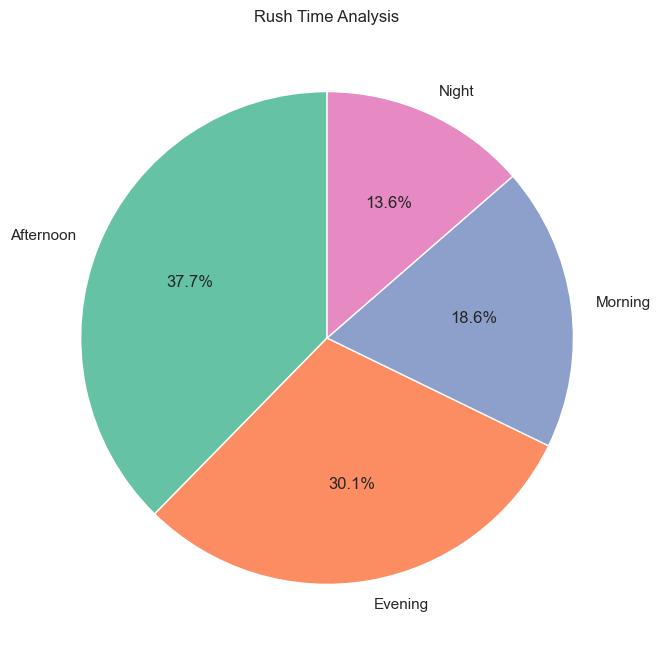

In [68]:
def categorize_time(hour):    
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'
#print(df['END_TIME_ONLY'].dtype)
df['END_TIME_ONLY'] = df['END_TIME_ONLY'].astype(str)
df['Hour_end'] = df['END_TIME_ONLY'].str.split(':').str[0].astype(int)
df['DAY_TIMES']=df['Hour_end'].apply(categorize_time)
rush_times=df.groupby('DAY_TIMES').size().reset_index(name='TRIP_COUNT').sort_values(by='TRIP_COUNT',ascending=False)
rush_times
sns.set(style="whitegrid")
plt.figure(figsize=(8, 8))
plt.pie(rush_times['TRIP_COUNT'], labels=rush_times['DAY_TIMES'], autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set2", len(rush_times)))
plt.title('Rush Time Analysis')
plt.show()


##  Q6. **Analyzing Distance and Time of Day on Category**

C:\Users\huawe\AppData\Local\Temp\ipykernel_28596\246563975.py:1: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




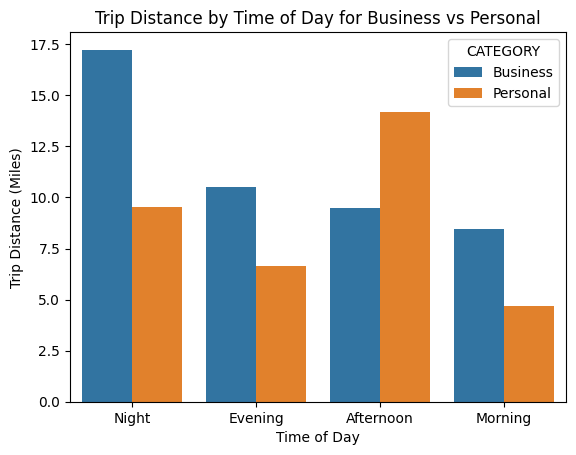

In [66]:
sns.barplot(data=df, x='DAY_TIMES', y='MILES', hue='CATEGORY',ci=None)
plt.title('Trip Distance by Time of Day for Business vs Personal')
plt.xlabel('Time of Day')
plt.ylabel('Trip Distance (Miles)')
plt.show()

#  Q7. **What is AVG Duration for trip by Purpose?**

count    1155.000000
mean       23.243290
std        27.318277
min         0.000000
25%        10.000000
50%        16.000000
75%        27.500000
max       336.000000
Name: Total_duration_Minutes, dtype: float64


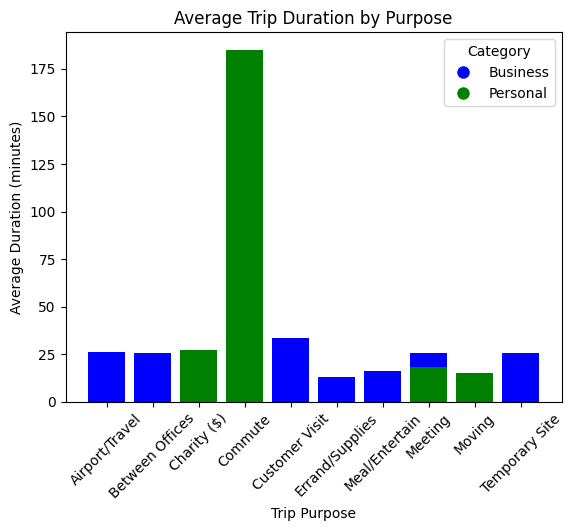

In [17]:

df['minutes_end']=df['END_TIME_ONLY'].str.split(':').str[1].astype(int)
df['START_TIME_ONLY']=df['START_TIME_ONLY'].astype(str)
df['Hour_start']=df['START_TIME_ONLY'].str.split(':').str[0].astype(int)
df['minutes_start']=df['START_TIME_ONLY'].str.split(':').str[1].astype(int)
df['Duration_1']=df['Hour_end']-df['Hour_start']
df['Duration_2']=df['minutes_end']-df['minutes_start']
df.loc[df['Duration_2'] < 0, 'Duration_1'] -= 1
df.loc[df['Duration_2'] < 0, 'Duration_2'] += 60
df.loc[df['Duration_1'] < 0, 'Duration_1'] += 24
df['Total_duration_Minutes'] = df['Duration_1'] * 60 + df['Duration_2']


print(df['Total_duration_Minutes'].describe())
df['Total_duration_Minutes'] = df['Duration_1'].astype(int)*60 + df['Duration_2'].astype(int)

average_duration_by_purpose = df.groupby(['PURPOSE','CATEGORY'])['Total_duration_Minutes'].mean().reset_index()
category_colors = {'Business': 'blue', 'Personal': 'green'}
average_duration_by_purpose['color'] = average_duration_by_purpose['CATEGORY'].map(category_colors)

plt.bar(average_duration_by_purpose['PURPOSE'], average_duration_by_purpose['Total_duration_Minutes'], color=average_duration_by_purpose['color'])
plt.title('Average Trip Duration by Purpose')
plt.xlabel('Trip Purpose')
plt.ylabel('Average Duration (minutes)')
plt.xticks(rotation=45)
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10) for color in category_colors.values()]
labels = list(category_colors.keys())
plt.legend(handles=handles, labels=labels, title='Category')
plt.show()

##  Q8.**Number of rides per week or per month?**

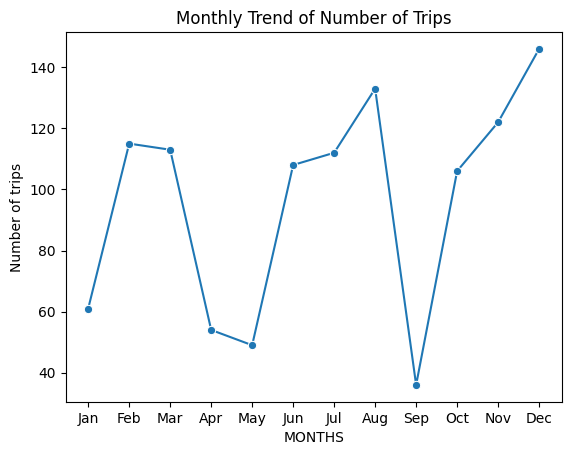

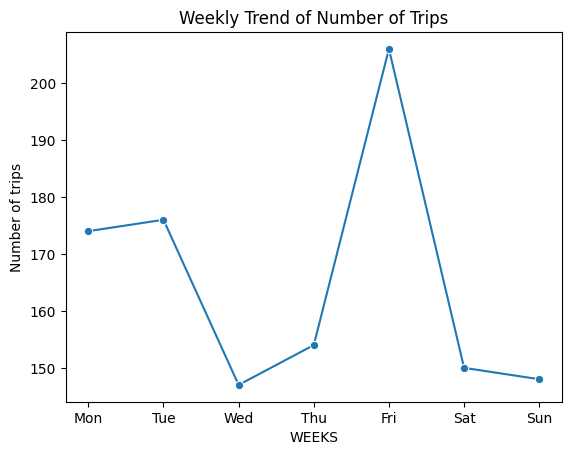

In [67]:
df['month']=df['START_DATE_ONLY'].dt.month
monthly_trips=df['month'].value_counts()
sns.lineplot(y=monthly_trips.values,x=monthly_trips.index, marker='o')
plt.title('Monthly Trend of Number of Trips')
plt.xlabel('MONTHS')
plt.ylabel('Number of trips')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

df['week']=df['START_DATE_ONLY'].dt.weekday
Weekly_trips=df['week'].value_counts()
sns.lineplot(y=Weekly_trips.values,x=Weekly_trips.index, marker='o')
plt.title('Weekly Trend of Number of Trips')
plt.xlabel('WEEKS')
plt.ylabel('Number of trips')
plt.xticks(ticks=range(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()





#  Q9.**How do average distances and durations vary across different trip purposes and times of day?"**

In [39]:
trip_analysis = df.groupby(['PURPOSE', 'DAY_TIMES']).agg(
    avg_distance=('MILES', 'mean'),
    avg_duration=('Total_duration_Minutes', 'mean') 
).reset_index().sort_values(by=['avg_distance','avg_duration'],ascending=False)
trip_analysis.describe()
trip_analysis

,PURPOSE,DAY_TIMES,avg_distance,avg_duration
7,Commute,Afternoon,180.200000,185.000000
11,Customer Visit,Night,33.805556,43.833333
8,Customer Visit,Afternoon,25.844118,40.970588
28,Temporary Site,Night,22.133333,45.666667
4,Between Offices,Morning,21.066667,48.666667
23,Meeting,Night,19.400000,34.540230
6,Charity ($),Morning,15.100000,27.000000
21,Meeting,Evening,12.865000,27.105000
9,Customer Visit,Evening,12.425806,24.580645
10,Customer Visit,Morning,12.061111,23.944444


C:\Users\huawe\AppData\Local\Temp\ipykernel_28596\3172594863.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\huawe\AppData\Local\Temp\ipykernel_28596\3172594863.py:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




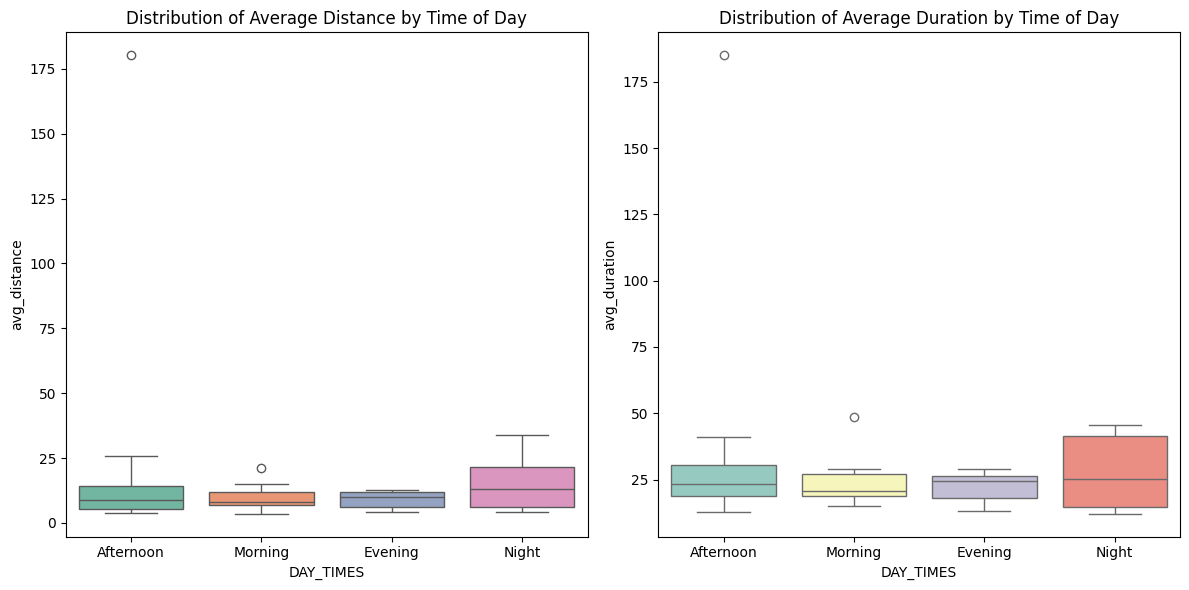

In [20]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x='DAY_TIMES', y='avg_distance', data=trip_analysis, palette='Set2')
plt.title('Distribution of Average Distance by Time of Day')

plt.subplot(1, 2, 2)
sns.boxplot(x='DAY_TIMES', y='avg_duration', data=trip_analysis, palette='Set3')
plt.title('Distribution of Average Duration by Time of Day')

plt.tight_layout()
plt.show()


# Q10. **What are the top starting and stopping locations for trips ?**


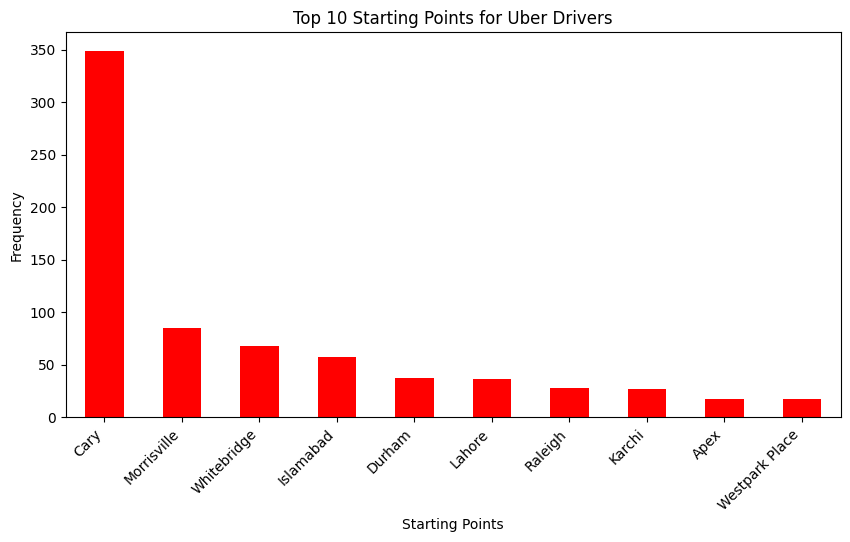

In [41]:
top_starting_points = df['START'].value_counts().head(10)

# Plotting
plt.figure(figsize=(10, 5))
top_starting_points.plot(kind='bar', color='r')
plt.title('Top 10 Starting Points for Uber Drivers')
plt.xlabel('Starting Points')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()

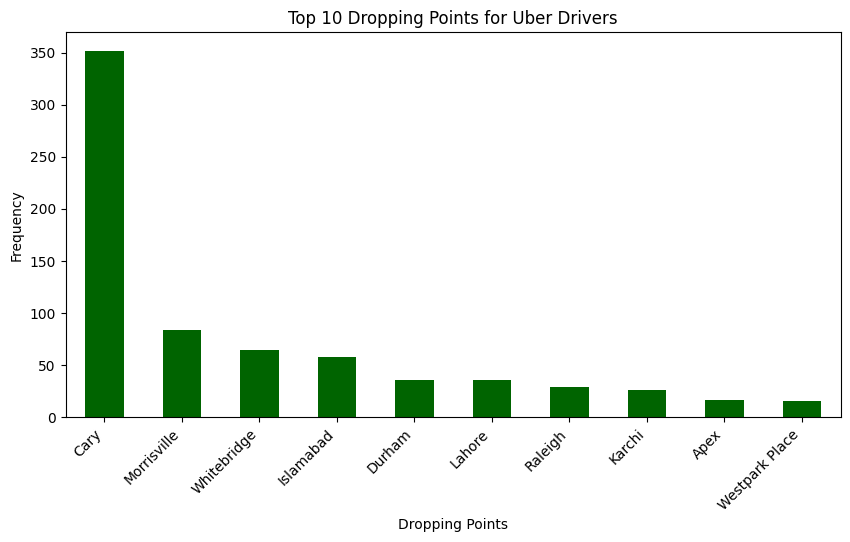

In [43]:
top_dropping_points = df['STOP'].value_counts().head(10)

plt.figure(figsize=(10, 5))
top_dropping_points.plot(kind='bar', color='darkgreen')
plt.title('Top 10 Dropping Points for Uber Drivers')
plt.xlabel('Dropping Points')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()

# Uber Data Analysis - Key Insights
- #### *This analysis provides a comprehensive understanding of Uber usage patterns, highlighting the differences between business and personal trips, peak usage times, and typical trip lengths. The insights gathered can help optimize operations, marketing strategies, and customer engagement for Uber.*


## Insights

1. **Primary Trip Purposes**
   - **Meeting is Most Important Purpose that used for it UBER**

2. **Trip Category Distribution (Business vs. Personal)**
    - **Business Make More Trip Versus the Personal Trips**


3. **Average Trip Distance per Purpose**
    - **The analysis revealed a significant difference in the average trip distances across different trip purposes. Specifically, the "commute" trips exhibit an unusually high average distance of approximately 150 miles, which stands out as an outlier compared to other trip types. In contrast, the average distances for other trip purposes typically range from 8 to 25 miles, indicating that the "commute" trips are substantially longer than the other trip types. This suggests that the "commute" category may include atypical data points or require further investigation to understand the underlying reasons for this discrepancy.**

4. **Peak Usage Times**
    - **The Peak time usage(Rush Time) is at Afternoon follwing it Evening time**

5. **Top Starting and Stopping Locations**
    - **'Cary' is most frequent start and stop location**

6. **Trip Distance and Duration by Time of Day**

    - **Afternoon has the longest and most varied trips.**
    - **Morning trips are generally short with occasional longer trips (outliers).**
    - **Evening trips are the shortest and most consistent.**
    - **Night trips are longer and stable, with no outliers**


7. **Average Trip Duration**

    - **Average time is 23 minutes for trips**
    -  **Charity, commute and moving are only personal trips**

8. **Most Common Trip Route**

    - **From carry to morrisville**

9. **Number of rides per week or per month or per day**
    - **'December' have most bookings and 'septemper' have lowest bookings**
    - **'Friday' have most bookings and 'Sunday' have lowest bookings**
         
